In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the data
file = 'ex1data2.txt'
data = pd.read_csv(file, header = None, names = ['Size','Bedrooms','Price'])
print(data.head())

   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900


In [3]:
#Scale is varrying
#Normalizing the data
data = (data- data.mean())/data.std()
print(data.head())

#Inserting Ones as bias in data
data.insert(0, 'Ones', 1)

       Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389


In [4]:
#Assigning X, y and theta
cols = data.shape[1]
X = data.iloc[:,0: cols -1]
y = data.iloc[:, cols-1:cols]

#Converting X, y and theta into matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(cols-1))

In [5]:
#defining cost function
cost_hist = []
def computeCost(X, y, theta):
    J = np.power(((X*theta.T)-y),2)
    return np.sum(J)/(2*len(X))

In [6]:
#Gradient descent equation
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        error = (X*theta.T) - y
        grad = np.multiply(error, X)
        grad_cost = np.mean(grad, axis = 0)
        theta = theta - alpha*grad_cost
        cost = computeCost(X, y, theta)
        if i % 100 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))
        cost_hist.append(cost)
    return theta

In [7]:
alpha = 0.01
iters = 1000

In [10]:
#final calculation and output
final_theta = gradientDescent(X, y, theta, alpha, iters)
final_cost = computeCost(X, y, final_theta)
print ('final_theta = '+str(final_theta),'\n'+'final_cost = '+ str(final_cost))

iter: 0 cost: 0.480549104108
iter: 100 cost: 0.182094438013
iter: 200 cost: 0.147938249574
iter: 300 cost: 0.137759134505
iter: 400 cost: 0.133660377725
iter: 500 cost: 0.131940465295
iter: 600 cost: 0.131215403524
iter: 700 cost: 0.130909584487
iter: 800 cost: 0.130780587916
iter: 900 cost: 0.130726175946
final_theta = [[ -1.10856950e-16   8.78503652e-01  -4.69166570e-02]] 
final_cost = 0.130703369608


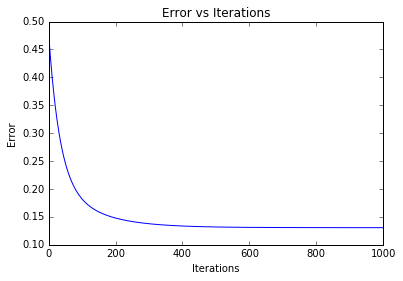

In [9]:
#Visualize error vs iterations
plt.plot(np.arange(iters), cost_hist)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs Iterations')
plt.show()